# Wczytanie bibliotek

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
%matplotlib inline


# Regresja logistyczna

### Ćwiczenie 1: regresja logistyczna, przykład ilustracyjny

Dla danych dane1 dotyczących zdawalności egzaminu w zależności od czasu poświęconego na naukę, zbuduj model 
regresji logistycznej na danych treningowych i oceń dopasowanie na danych testowych. Przedstaw wyniki 
na wykresie. Według zbudowanego modelu, jakie jest prawdopodobieństwo zdania egzaminu dla osoby, która uczyła się przez 6 godzin? 

In [70]:
dane1 = pd.read_csv("dane1_log.csv")

In [71]:
dane1

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [72]:
X_train, X_test, y_train, y_test = train_test_split(dane1["Hours"], dane1["Pass"], stratify = dane1["Pass"], random_state = 17)

In [73]:
X_train = np.array(X_train).reshape((-1, 1))

In [74]:
X_test = np.array(X_test).reshape((-1, 1))

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [104]:
model1 = LogisticRegression() # L2, C = 1

In [105]:
model1.fit(X_train, y_train)

LogisticRegression()

In [106]:
model1.coef_

array([[1.03005664]])

In [107]:
model1.intercept_

array([-2.99906149])

p(x) = 1/(1+exp(3-1.03x))

In [108]:
model1.predict(X_train)

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [109]:
y_train

3     0
5     0
4     0
9     0
14    1
11    0
0     0
6     1
2     0
12    1
15    1
19    1
18    1
10    1
13    0
Name: Pass, dtype: int64

In [110]:
np.mean(model1.predict(X_train) == y_train)

0.7333333333333333

In [111]:
model1.score(X_train, y_train)

0.7333333333333333

In [112]:
model1.score(X_test, y_test)

0.8

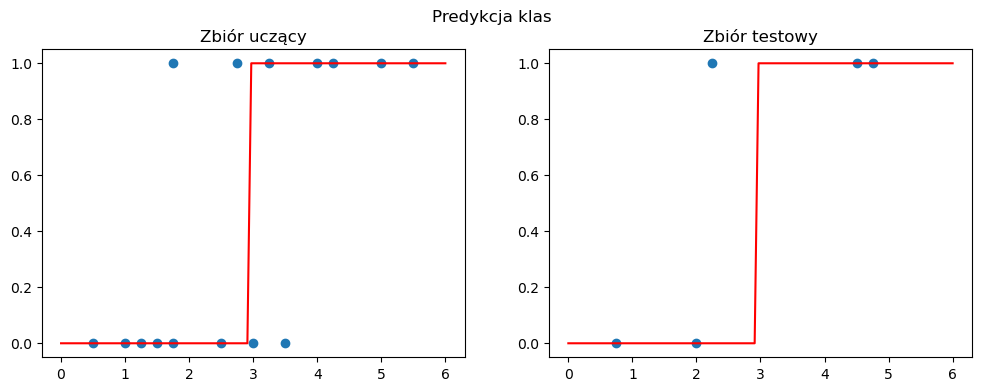

In [128]:
X_line = np.linspace(0, 6, 100).reshape(-1,1)
y_line = model1.predict(X_line)
fig = plt.figure(figsize = (12,4))
fig.suptitle("Predykcja klas")
plt.subplot(121)
plt.scatter(X_train, y_train)
plt.plot(X_line, y_line, c = "red") 
plt.title("Zbiór uczący")

plt.subplot(122)
plt.scatter(X_test, y_test)
plt.plot(X_line, y_line, c = 'red') 
plt.title("Zbiór testowy")

plt.show()

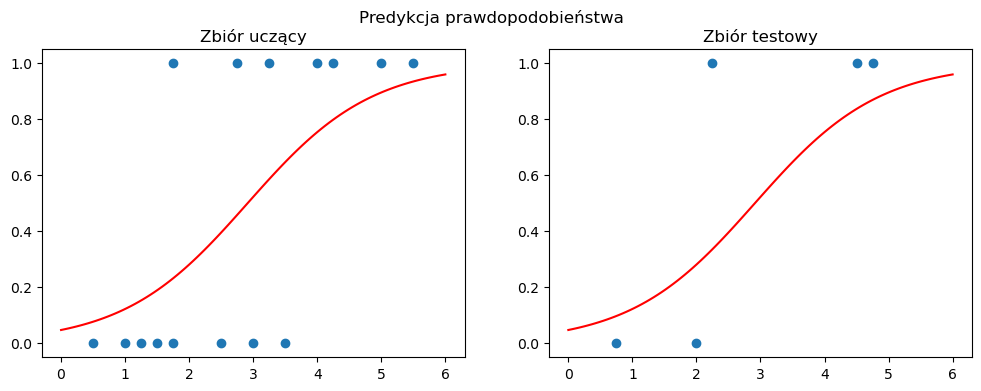

In [129]:
X_line = np.linspace(0, 6, 100).reshape(-1,1)
y_line = model1.predict_proba(X_line)[:,1]
fig = plt.figure(figsize = (12,4))
fig.suptitle("Predykcja prawdopodobieństwa")
plt.subplot(121)
plt.scatter(X_train, y_train)
plt.plot(X_line, y_line, c = "red") 
plt.title("Zbiór uczący")

plt.subplot(122)
plt.scatter(X_test, y_test)
plt.plot(X_line, y_line, c = 'red') 
plt.title("Zbiór testowy")

plt.show()

In [122]:
model1.predict_proba(np.array(6).reshape(-1,1)) # 0.96

array([[0.03987636, 0.96012364]])

### Zadanie 1: regresja logistyczna, breast cancer

Dla danych breast cancer dotyczących złośliwości raka piersi (złośliwy lub nie) w zależności od pomiarów guza, zbuduj model 
regresji logistycznej na danych treningowych i oceń dopasowanie na danych testowych. Przed dopasowaniem modelu przeskaluj dane.

In [2]:
X, y = load_breast_cancer(return_X_y = True, as_frame = True)

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [3]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
np.bincount(y)

array([212, 357])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 17)

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(X_train)

StandardScaler()

In [8]:
X_train_scaled = scaler.transform(X_train)

In [9]:
X_test_scaled = scaler.transform(X_test)

In [10]:
model1 = LogisticRegression()

In [11]:
model1.fit(X_train_scaled, y_train)

LogisticRegression()

In [12]:
model1.score(X_train_scaled, y_train)

0.9835680751173709

In [13]:
model1.score(X_test_scaled, y_test)

0.986013986013986

### Pipeline - połączymy skalowanie z uczeniem modelu

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [14]:
model_pipe = Pipeline([("standarization", StandardScaler()),("LogisticRegression", LogisticRegression())])

In [15]:
model_pipe.fit(X_train, y_train)

Pipeline(steps=[('standarization', StandardScaler()),
                ('LogisticRegression', LogisticRegression())])

In [16]:
model_pipe.score(X_test, y_test)

0.986013986013986

### Kroswalidacja

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [17]:
CV_score = cross_val_score(model_pipe, X, y, cv = 10)

In [18]:
CV_score

array([0.98245614, 0.98245614, 0.98245614, 0.96491228, 0.98245614,
       0.98245614, 0.94736842, 1.        , 1.        , 0.98214286])

In [19]:
CV_score.mean()

0.9806704260651629

### Regresja logistyczna z regularyzacją grzbietową

Funkcja LogisticRegression() domyślnie dopasowuje regularyzację grzbietową z parametrem C = 1. Zmieńmy parametr C (1, 10, 1/10, 1/100). 
Ale użyjmy dla różnych wartości C takiej samej kroswalidacji (tych samych podziałów zbioru). 

Oddzielamy zbiór testowy - na samym końcu użyjemy go do oceny błędu predyckji wybranego modelu. 
Model wybierzemy pośród: regularyzacji grzbietowej dla C = 1, 10, 1/10, 1/100 i Lasso dla C = 1, 10, 1/10, 1/100. 
Wybór modelu zrobimy z wykorzystaniem kroswalidacji.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 17)

Uwaga! Na zajęciach tutaj było KFold, powinno być StratifiedKFold, przepraszam za pomyłkę (metodę też trzeba zaimportować zamiast KFold)! Definiujemy podział zbioru na 10 części, którego użyjemy dla każdej kroswalidacji (w fcji cross_val_score) żeby 
za każdym razem użyć tego samego podziału:

In [21]:
kfold = StratifiedKFold(n_splits = 10)

Pierwszy model: skalowanie + regresja grzbietowa, C = 1: 

In [22]:
model1 = Pipeline([("standarization", StandardScaler()),("LogisticRegression", LogisticRegression(C = 1))])

In [23]:
CV_score1 = cross_val_score(model1, X_train, y_train, cv = kfold)

Score za pomocą kroswalidacji dla pierwszego modelu:

In [24]:
CV_score1.mean()

0.9742524916943521

Drugi model: skalowanie + regresja grzbietowa, C = 10: 

In [25]:
model2 = Pipeline([("standarization", StandardScaler()),("LogisticRegression", LogisticRegression(C = 10))])

In [26]:
CV_score2 = cross_val_score(model2, X_train, y_train, cv = kfold)

Score za pomocą kroswalidacji dla drugiego modelu:

In [27]:
CV_score2.mean()

0.969545957918051

Trzeci model: skalowanie + regresja grzbietowa, C = 1/100: 

In [28]:
model3 = Pipeline([("standarization", StandardScaler()),("LogisticRegression", LogisticRegression(C = 1/100))])

In [29]:
CV_score3 = cross_val_score(model3, X_train, y_train, cv = kfold)

Score za pomocą kroswalidacji dla trzeciego modelu:

In [30]:
CV_score3.mean()

0.9459579180509413

Czwarty model: skalowanie + regresja grzbietowa, C = 1/10: 

In [31]:
model4 = Pipeline([("standarization", StandardScaler()),("LogisticRegression", LogisticRegression(C = 1/10))])

In [32]:
CV_score4 = cross_val_score(model4, X_train, y_train, cv = kfold)

Score za pomocą kroswalidacji dla czwartego modelu:

In [33]:
CV_score4.mean()

0.969545957918051

Najlepszy model to model pierwszy: skalowanie + regresja grzbietowa z C = 1 (ma najwyższy score). Teraz sprawdzimy Lasso.

### Zadanie 2: regresja logistyczna z LASSO, breast cancer

Zbuduj model regresji logistycznej z LASSO dla danych breast cancer. Znajdź optymalny parametr C pośród 4 wartości:  .01, .1,  1, 10

Dla Lasso ustawiamy penalty = "l1" i solver = "liblinear"

Pierwszy model Lasso: skalowanie + Lasso, C = 1: 

In [34]:
model1_lasso = Pipeline([("standarization", StandardScaler()),("LogisticRegression", LogisticRegression(C = 1, penalty = "l1", solver = "liblinear"))])

In [35]:
CV_score_lasso1 = cross_val_score(model1_lasso, X_train, y_train, cv = kfold)

Score za pomocą kroswalidacji dla pierwszego modelu Lasso:

In [36]:
CV_score_lasso1.mean()

0.9696013289036545

Drugi model Lasso: skalowanie + Lasso, C = .1: 

In [37]:
model2_lasso = Pipeline([("standarization", StandardScaler()),("LogisticRegression", LogisticRegression(C = .1, penalty = "l1", solver = "liblinear"))])

In [38]:
CV_score_lasso2 = cross_val_score(model2_lasso, X_train, y_train, cv = kfold)

Score za pomocą kroswalidacji dla drugiego modelu Lasso:

In [39]:
CV_score_lasso2.mean()

0.9553709856035437

Trzeci model Lasso: skalowanie + Lasso, C = .01: 

In [40]:
model3_lasso = Pipeline([("standarization", StandardScaler()),("LogisticRegression", LogisticRegression(C = .01, penalty = "l1", solver = "liblinear"))])

In [41]:
CV_score_lasso3 = cross_val_score(model3_lasso, X_train, y_train, cv = kfold)

Score za pomocą kroswalidacji dla trzeciego modelu Lasso:

In [42]:
CV_score_lasso3.mean()

0.9109080841638981

Czwarty model Lasso: skalowanie + Lasso, C = 10: 

In [43]:
model4_lasso = Pipeline([("standarization", StandardScaler()),("LogisticRegression", LogisticRegression(C = 10, penalty = "l1", solver = "liblinear"))])

In [44]:
CV_score_lasso4 = cross_val_score(model4_lasso, X_train, y_train, cv = kfold)

Score za pomocą kroswalidacji dla czwartego modelu Lasso:

In [45]:
CV_score_lasso4.mean()

0.9672203765227021

Ostateczny najlepszy model to skalowanie + regresja grzbietowa z C = 1. Dopasujemy model na całych 
danych X_train i y_train. Na X_test i y_test policzymy score.  

In [46]:
model_fin = Pipeline([("standarization", StandardScaler()),("LogisticRegression", LogisticRegression(C = 1))])

In [47]:
model_fin.fit(X_train, y_train)

Pipeline(steps=[('standarization', StandardScaler()),
                ('LogisticRegression', LogisticRegression(C=1))])

In [48]:
model_fin.score(X_train, y_train)

0.9835680751173709

In [49]:
model_fin.score(X_test, y_test)

0.986013986013986

# Źródła:

Hastie, Trevor, et al. The elements of statistical learning: data mining, inference, and prediction. Vol. 2. New York: springer, 2009.

Muller, Andreas, et al. Machine learning, Python i data science, Wprowadzenie. Helion, 2021.

Sklearn tutorials